In [530]:
#this cell has what you will need to import

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as optimise
from scipy import signal, ndimage
import re
import fnmatch

#I use these to loop over the directories
import os
from pathlib import Path

from astropy.io import fits #to read a fits file
from astropy.convolution import convolve, Gaussian1DKernel # to smooth histogram 


#I use this package to convert from redshift to year
#Renyue implied doing this conversion is trivial
#but it is not. I suggest reading up on this
#package and then using it.
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.272)

In [3]:
def read_sun(director):
    
    
    masses=[] 
    sfrs=[]
    metals=[]
    ages=[]
    
    for filename in os.listdir(director):
        
        if filename.startswith('sun'):
            
            sfile=director+'/'+filename
                    
            hdul = fits.open(sfile)
            data=hdul[4].data                
            hdul.close()
                    
            #here I calculate the star formation rate as the total
            #mass of star particles less than a Myr old
            good_age=data['age']<1e6
            sfr = sum(data['mass'][good_age])/1e6
            
            masses.append(np.array(data['mass']))
            sfrs.append(sfr)
            metals.append(np.array(data['metallicity']))
            ages.append(np.array(data['age']))
                    

    masses=np.array(masses)
    sfrs=np.array(sfrs)
    metals=np.array(metals)
    ages=np.array(ages)
    

    return masses,sfrs,metals,ages

In [534]:
mass,sfrs,metals,ages=read_sun('out01461')

In [535]:
def plot_mass_hist(galaxy):
    
    """
    Plots a histogram of star particle age, weighted by mass
    Parameters:
        galaxy: galaxy number (0-585)
    Returns figure object
    
    """
    
    max_age = int(max(ages[galaxy]))
    digits = len(str(max_age))
    max_bin = (int(np.ceil(max_age / 10**(digits-1))) + 1) * 100
    fig = plt.figure()
    plt.hist(ages[galaxy], bins = np.arange(max_bin)*1e6, weights = mass[galaxy])
    plt.title("Histogram of star particles ages in galaxy %i, weighted by mass" % galaxy)
    plt.ylabel("Total star particle mass ($M_\odot$)")
    plt.xlabel("Star particle age (years)")
    return fig

In [536]:
def calc_mass_hist(galaxy):
    
    """
    Calculates a histogram of star particle age, weighted by mass
    Parameters:
        galaxy: galaxy number (0-585)
    Returns mass value of each bin (n) and the left edges of the bins + the right edge of the last bin (bins)
    
    """
    max_age = int(max(ages[galaxy]))
    digits = len(str(max_age))
    max_bin = int(np.ceil(max_age / 10**(digits-1))) * 100
    n, bins = np.histogram(ages[galaxy], bins = np.arange(max_bin)*1e6, weights = mass[galaxy])
    return n,bins

In [537]:
def sfr(galaxy):
    
    """ 
    Calculates star formation rate by dividing the mass value of each histogram bin by bin width
    Parameters:
        galaxy: galaxy number (0-585)
    Returns array of star formation values, and the (n,bins) output of the histogram calculation
      
    """
    
    max_age = int(max(ages[galaxy]))
    digits = len(str(max_age))
    max_bin = (int(np.ceil(max_age / 10**(digits-1))) +1) * 100
    n,bins = np.histogram(ages[galaxy], bins = np.arange(max_bin)*1e6, weights = mass[galaxy])
    bin_width = bins[1] - bins[0]
    sfr_array = n/bin_width
    return np.array(sfr_array), n, bins
    

In [201]:
# Saves Histograms in folder
for i in range(len(mass)):
    print(i)
    fig = plot_mass_hist(i)
    fig.savefig('Star Formation Histograms/galaxy_%i.png' %i)
    plt.tight_layout()
    fig.clf()
    plt.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [566]:
# Saves plots of star formation rate in folder, on a log scale

for i in range(len(mass)):
    print(i)
    sfr_array, n, bins = sfr(i)
    fig = plt.figure()
    plt.plot(bins[:-1], sfr_array)
    plt.title("Star formation rate of star particles in galaxy %i" % i)
    plt.ylabel("Star Formation Rate ($M_\odot yr^{-1}$)")
    plt.xlabel("Star particle age (years)")
    plt.yscale("log")
    fig.savefig('Logged SFRs/galaxy_%i.png' %i)
    plt.tight_layout()
    fig.clf()
    plt.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [538]:
def smoothing(galaxy, resolution):
    
    """
    Smooths star formation rate
    Parameters:
        galaxy: galaxy number (0-585)
        resolution: standard deviation of Gaussian used for smoothing
    Returns the smoothed array and the (n,bins) output of the histogram   
    """
    sfr_array, n, bins = sfr(galaxy)
    smoothed_sfr = convolve(sfr_array, Gaussian1DKernel(resolution))
    return np.array(smoothed_sfr), n, bins

In [539]:
def extrema(galaxy, resolution):
    
    """
    Finds peaks of smoothed SFR, requiring > 10 Myr separation between neighboring peaks
    
    Parameters:
        galaxy: galaxy number (0-585)
        resolution: standard deviation of Gaussian used for smoothing
    
    Returns a numpy array of indices of relevant maxima
    
    """
    
    smoothed_sfr, n, bins = smoothing(galaxy, resolution)
    maxima = np.array(signal.find_peaks(smoothed_sfr)[0])    

    # Checks 10 Myr separation between peaks
    maxima_separation = np.diff(maxima) - 10
    ignored_peaks = np.where(maxima_separation <= 0)
    final_maxima = np.delete(maxima, ignored_peaks)
    
    return np.array(final_maxima)
    


In [549]:
def sfr_end(galaxy, resolution):
    
    """
    Find the indices of the ends of starbursts, defined as the point at which SFR is a tenth of peak value
    
    Parameters:
        galaxy: galaxy number (0-585)
        resolution: standard deviation of Gaussian used for smoothing
        
    Returns maxima, indices of end times, and array of peak widths that were used for the search window
    
    """
    
    
    smoothed_sfr, n, bins = smoothing(galaxy, resolution)
    maxima = extrema(galaxy, resolution)
    t = 0.1 * smoothed_sfr[maxima] # points that are searched for 
    idx = np.zeros(len(maxima), dtype = int) # array to hold indices for ends of star formation
    
    # Finds widths associated with each peak, to define a window for search
    widths = np.array(signal.peak_widths(smoothed_sfr, maxima, rel_height= 1.0)[0], dtype = int)
    
    # Condition to ensure that first peak is identified
    if ((maxima[0] < 20) & (widths[0] <= 65)):
            widths[0] = 65
            
    # Defines a search window and populates array of indices   
    for i in range(len(maxima)):  
        if (widths[i] == 0):
            widths[i] = 50
        search_array = np.asarray(smoothed_sfr[maxima[i]:maxima[i] + widths[i]])
        idx[i] = (np.abs(search_array - t[i])).argmin()

    return maxima, maxima + idx, widths
    

In [562]:
def plot_tend(galaxy, resolution):
    
    """
    
    Plots end times for SFRs as vertical black lines
    
    Parameters:
        galaxy: galaxy number (0-585)
        resolution: standard deviation of Gaussian used for smoothing
    
    """      
    smoothed_sfr, n, bins = smoothing(galaxy, resolution)
    maxima = extrema(galaxy, resolution)  
    maxima, times, widths = sfr_end(galaxy, resolution)
    
    
    # An array to hold height ratios to check for shallow peaks
    height_differences = np.zeros(len(times))
    
    # Removes maxima where identified end times are too shallow
    for i in range(len(times)):
        valley = smoothed_sfr[times[i]]
        if (valley == 0):
            valley = 1e-10
        height_differences[i] = smoothed_sfr[maxima[i]] / valley       
    ignore_peaks = np.where(np.ceil(height_differences) < 9)
    maxima = np.delete(maxima, ignore_peaks)
    times = np.delete(times, ignore_peaks)
    widths = np.delete(widths, ignore_peaks)
    
    
    # Repopulates widths adjusted for the new maxima  
    t = 0.1 * smoothed_sfr[maxima]
    for i in range(len(widths)-1):
        new_width = np.argmin(smoothed_sfr[maxima[i]:maxima[i+1]])
        widths[i] = new_width
        search_array = np.asarray(smoothed_sfr[maxima[i]:maxima[i] + new_width])
        times[i] = (np.abs(search_array - t[i])).argmin() + maxima[i]
    
 
    # Removes peaks that are less than a factor of 10 from the subsequent valley
    forward_differences = np.zeros(len(times))
    for i in range(len(times)):
        if (i == len(times)-1):
            forward_valley = np.min(smoothed_sfr[maxima[i]:])
        else:
            forward_valley = np.min(smoothed_sfr[maxima[i]:maxima[i+1]])
        
        if (forward_valley == 0):
            forward_valley = 1e-10   
        forward_differences[i] = smoothed_sfr[maxima[i]] / forward_valley      
    ignore_peaks = np.where(forward_differences < 10)[0]
    maxima = np.delete(maxima, ignore_peaks)
    times = np.delete(times, ignore_peaks)
    widths = np.delete(widths, ignore_peaks)  
     
    # Removes peaks that are less than a factor of 4 from the previous valley
    backward_differences = np.zeros(len(times))
    for i in range(1, len(times)):
        if (i == 0):
            backward_valley = np.min(smoothed_sfr[:maxima[i]])
        else:
            backward_valley = np.min(smoothed_sfr[maxima[i-1]:maxima[i]])
        if (backward_valley == 0):
            backward_valley = 1e-10
        backward_differences[i] = smoothed_sfr[maxima[i]] / backward_valley
    ignore_peaks = np.where(backward_differences[1:] < 4)[0]
    maxima = np.delete(maxima, ignore_peaks + 1)
    times = np.delete(times, ignore_peaks + 1)
    widths = np.delete(widths, ignore_peaks + 1)  
    
    
    # Plots end times and SFR on a log scale
    plt.plot(bins[:-1], smoothed_sfr)
    plt.scatter(bins[maxima], smoothed_sfr[maxima], color = 'r')
    plt.yscale("log")
    [plt.axvline(bins[times[i]], color = 'k') for i in range(len(times))]
    plt.title("Smoothed Star formation rate of star particles in galaxy %i" % galaxy)
    plt.ylabel("Star Formation Rate ($M_\odot yr^{-1}$)")
    plt.xlabel("Star particle age (years)")

In [559]:
def t_end(galaxy, resolution = 5):
    
    """
    
    Finds the end times for star formation peaks
    
    Parameters:
        galaxy: galaxy number (0-585)
        resolution: standard deviation of Gaussian used for smoothing
        
    Returns array of star formation peak values and array of end times in years
    
    """   
    
    
    smoothed_sfr, n, bins = smoothing(galaxy, resolution)
    maxima = extrema(galaxy, resolution)  
    maxima, times, widths = sfr_end(galaxy, resolution)
    
    
    # An array to hold height ratios to check for shallow peaks
    height_differences = np.zeros(len(times))
    
    # Removes maxima where identified end times too shallow
    for i in range(len(times)):
        valley = smoothed_sfr[times[i]]
        if (valley == 0):
            valley = 1e-10
        height_differences[i] = smoothed_sfr[maxima[i]] / valley

        
    ignore_peaks = np.where(np.ceil(height_differences) < 9)
    maxima = np.delete(maxima, ignore_peaks)
    times = np.delete(times, ignore_peaks)
    widths = np.delete(widths, ignore_peaks)
    
    
    # Repopulates widths adjusted for the new maxima  
    t = 0.1 * smoothed_sfr[maxima]
    for i in range(len(widths)-1):
        new_width = np.argmin(smoothed_sfr[maxima[i]:maxima[i+1]])
        widths[i] = new_width
        search_array = np.asarray(smoothed_sfr[maxima[i]:maxima[i] + new_width])
        times[i] = (np.abs(search_array - t[i])).argmin() + maxima[i]
    
 
    # Removes peaks that are less than a factor of 10 from the subsequent valley
    forward_differences = np.zeros(len(times))
    for i in range(len(times)):
        if (i == len(times)-1):
            forward_valley = np.min(smoothed_sfr[maxima[i]:])
        else:
            forward_valley = np.min(smoothed_sfr[maxima[i]:maxima[i+1]])
        
        if (forward_valley == 0):
            forward_valley = 1e-10
    
        forward_differences[i] = smoothed_sfr[maxima[i]] / forward_valley
        
    ignore_peaks = np.where(forward_differences < 10)[0]
    maxima = np.delete(maxima, ignore_peaks)
    times = np.delete(times, ignore_peaks)
    widths = np.delete(widths, ignore_peaks)  
    
    
    
    # Removes peaks that are less than a factor of 4 from the previous valley
    backward_differences = np.zeros(len(times))
    for i in range(1, len(times)):
        if (i == 0):
            backward_valley = np.min(smoothed_sfr[:maxima[i]])
        else:
            backward_valley = np.min(smoothed_sfr[maxima[i-1]:maxima[i]])
        if (backward_valley == 0):
            backward_valley = 1e-10
        backward_differences[i] = smoothed_sfr[maxima[i]] / backward_valley
    ignore_peaks = np.where(backward_differences[1:] < 4)[0]
    maxima = np.delete(maxima, ignore_peaks + 1)
    times = np.delete(times, ignore_peaks + 1)
    widths = np.delete(widths, ignore_peaks + 1)  
    
    return bins[times], smoothed_sfr[maxima]
    

[0.00000000e+00 2.08783456e+01 4.09486242e+03 9.44498987e+02
 4.68820509e+04 1.73830797e+02 4.39265500e+02]
[0.00000000e+00 2.08783456e+01 4.09486242e+03 9.44498987e+02
 4.68820509e+04 1.73830797e+02 4.39265500e+02]
[ 98  42  16  64  23  27  95 227  27 193  45  45]
[ 54 114 134 161 205 244 318 448 387 510 484 513]


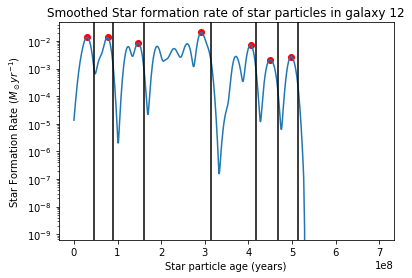

In [558]:
maxima = extrema(12,5)
maxima, times, widths = sfr_end(12,5)
#maxima, times, widths = filter_peaks(maxima, times, widths)
#print(maxima)
#print(np.diff(maxima))
plot_tend(12,5)
smoothed_sfr, n, bins = smoothing(12,5)

t, maxes = t_end(12)
#[plt.axvline(t[i], color = 'r') for i in range(len(t))]

#for i in range(len(times)):
    #print(smoothed_sfr[maxima[i]:maxima[i]+ widths[i]][times[i]])
#print(smoothed_sfr[maxima])
print(widths)
print(times)



In [563]:
# Saves Plots of End Times on log scale

for i in range(len(mass)):
    print(i)
    fig = plt.figure()
    plot_tend(i,5)
    plt.title("Smoothed star formation rate of star particles in galaxy %i" % i)
    plt.ylabel("Star Formation Rate ($M_\odot yr^{-1}$)")
    plt.xlabel("Star particle age (years)")    
    fig.savefig('End Times Logscale/galaxy_%i.png' %i)
    plt.tight_layout()
    fig.clf()
    plt.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27